In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')
import node
import bin_exploration as be

sample_size = 10000
samples = np.random.normal(.5, .1, size=sample_size).reshape(sample_size, 1)
plt.hist(samples)
plt.show()

In [13]:
k = 4191
dims = 1
tree = be.Exploration_tree(dims, k)

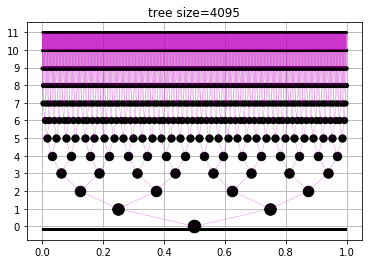

In [14]:
tree.plot()

In [27]:
th_value = 1/(4*k)
batch_size = 1000
sizes = []


values = []
batches = 100
for _ in range(batches):
    batch = np.random.normal(.5, .1, size=batch_size).reshape(batch_size, 1)

    for sample in batch:
        tree.search_nearest_node(sample)

    values.append(tree.get_total_value()/len(batch))
    sizes.append(tree.get_current_size())
    
    if _==batches-1:
        break
        
    tree.update()
    sizes.append(tree.get_current_size())
    

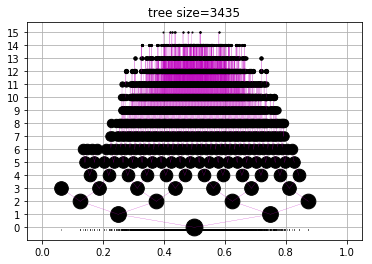

In [16]:
tree.plot()

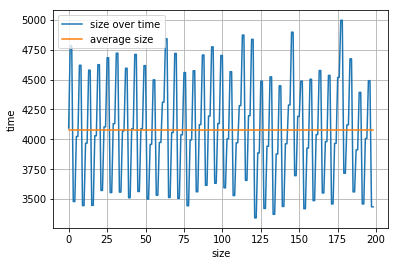

In [18]:
plt.plot(sizes, label='size over time')
plt.plot([0, len(sizes)-1], [np.average(sizes)]*2, label='average size')
plt.xlabel('size')
plt.ylabel('time')
plt.legend()
plt.grid(True)
plt.show()

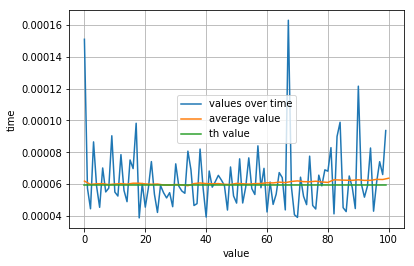

In [33]:
N = 50
plt.plot(values, label='values over time')
plt.plot(np.arange(0, 2*N+1, 2), np.convolve(values, np.ones((N,))/N, mode='valid'), label='average value')
plt.plot([0, len(values)-1], [th_value]*2, label='th value')
plt.xlabel('value')
plt.ylabel('time')
plt.legend()
plt.grid(True)
plt.show()

[6.27232253e-05 0.00000000e+00 0.00000000e+00 ... 2.66182571e-03
 0.00000000e+00 0.00000000e+00]
uniform value 5.965163445478406e-05


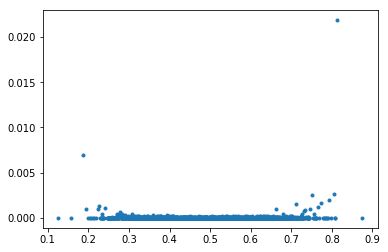

In [32]:
nodes = tree.get_nodes()
last_values = np.array(list(node.get_value() for node in nodes)).flatten()
points = np.array(list(node.get_location() for node in nodes)).flatten()

print(last_values)
print('uniform value', th_value)
plt.plot(points, last_values, '.')
# plt.plot(last_values)
plt.show()